In [1]:
#### Load packages
import numpy as np
import pandas as pd
import scanpy as sc

from python_utils import *

In [2]:
sc.settings.verbosity = 0 
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==2.0.1 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.8


In [3]:
### Load the pbmc3k dataset
adata = sc.datasets.pbmc3k()

### Load the pbmc3k_processed() dataset
#adata_proc = sc.datasets.pbmc3k_processed()

### Load the pbmc_processed()
#adata_proc_68 = sc.datasets.pbmc68k_reduced()

### Load CITE-Seq data
#adata_multi = sc.read("/Volumes/scratch-boeva/data/projects/Greta_clustering_errors/Data/multi.h5ad")

#### PBMCs 3k processing

Preprocessing and visualization

In [5]:
# filtering -
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [6]:
# qc- removal of cells with high fraction of mito genes or too many total counts
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [7]:
# store raw counts
adata.raw = adata
adata.raw

# write .h5da object for Splatter simulation
import anndata

# Save the ADATA object to a HDF5 file
adata.write_h5ad('pbmcs_filtered.h5ad')

In [7]:
# total-counts normalisation
sc.pp.normalize_total(adata, target_sum=1e4)

# log- transform
sc.pp.log1p(adata)

/Users/greta_bordin/opt/anaconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [8]:
# filtering for highly variable genes -
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]

# regress out- effects of total count per cell and perc. of mito genes expressed
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

# scale to unit variance, clip values exceeding std:10
sc.pp.scale(adata, max_value=10)

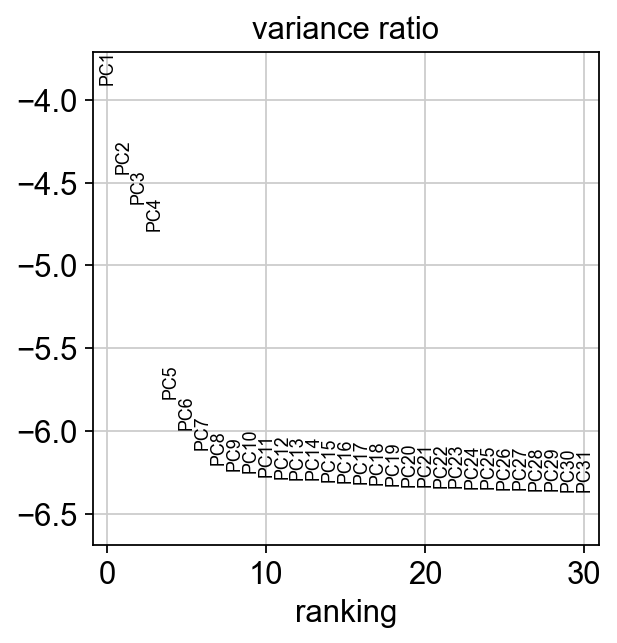

In [9]:
# PCA
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

Computing the neighborhood graph

In [10]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [11]:
sc.tl.umap(adata)

/Users/greta_bordin/opt/anaconda3/envs/lab/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


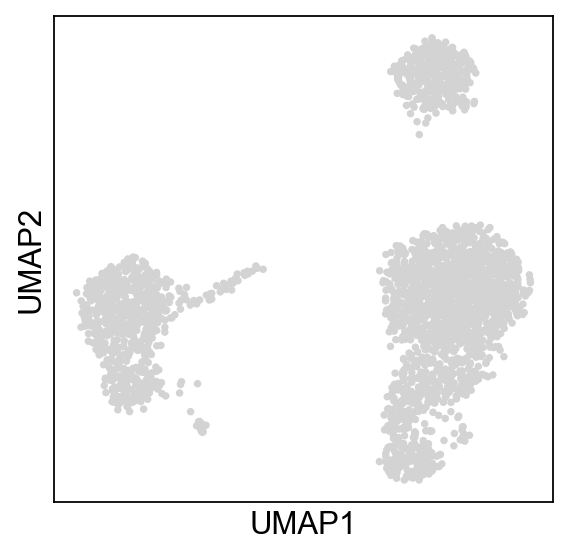

In [12]:
sc.pl.umap(adata)

Clustering the neighborhood graph

In [14]:
sc.tl.leiden(adata)

/Users/greta_bordin/opt/anaconda3/envs/lab/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


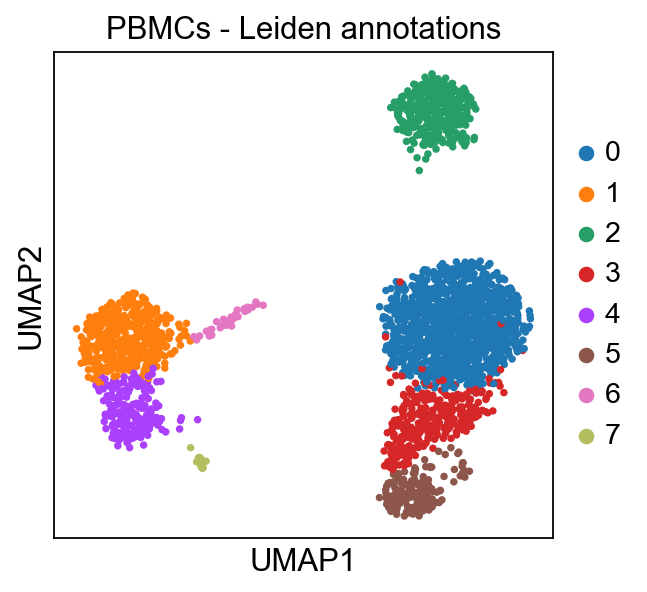

In [15]:
sc.pl.umap(adata, color = 'leiden', title='PBMCs - Leiden annotations')

### pre-processed datasets

##### Pbmcs3k

/Users/greta_bordin/opt/anaconda3/envs/lab/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


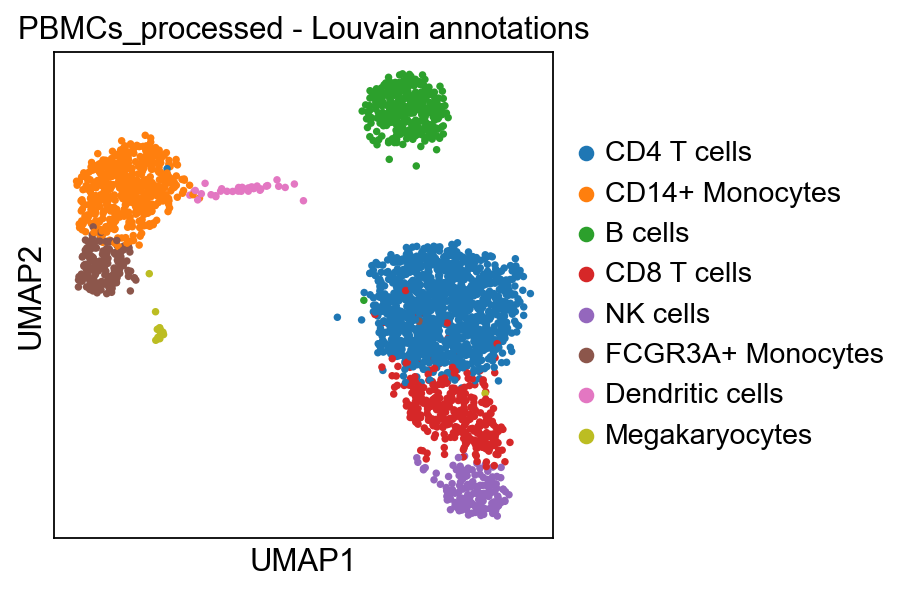

In [17]:
sc.pl.umap(adata_proc, color = 'louvain', title = 'PBMCs_processed - Louvain annotations')

Running main_test_DE_method for method=t-test
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for CD4 T cells
Performing differential expression test for B cells
Performing differential expression test for CD14+ Monocytes
Performing differential expression test for NK cells
Performing differential expression test for CD8 T cells
Performing differential expression test for FCGR3A+ Monocytes
Performing differential expression test for Dendritic cells
Performing differential expression test for Megakaryocytes
Performing differential expression test for CD4 T cells
Performing differential expression test for B cells
Performing differential expression test for CD14+ Monocytes
Performing differential expression test for NK cells
Performing differential expression test for

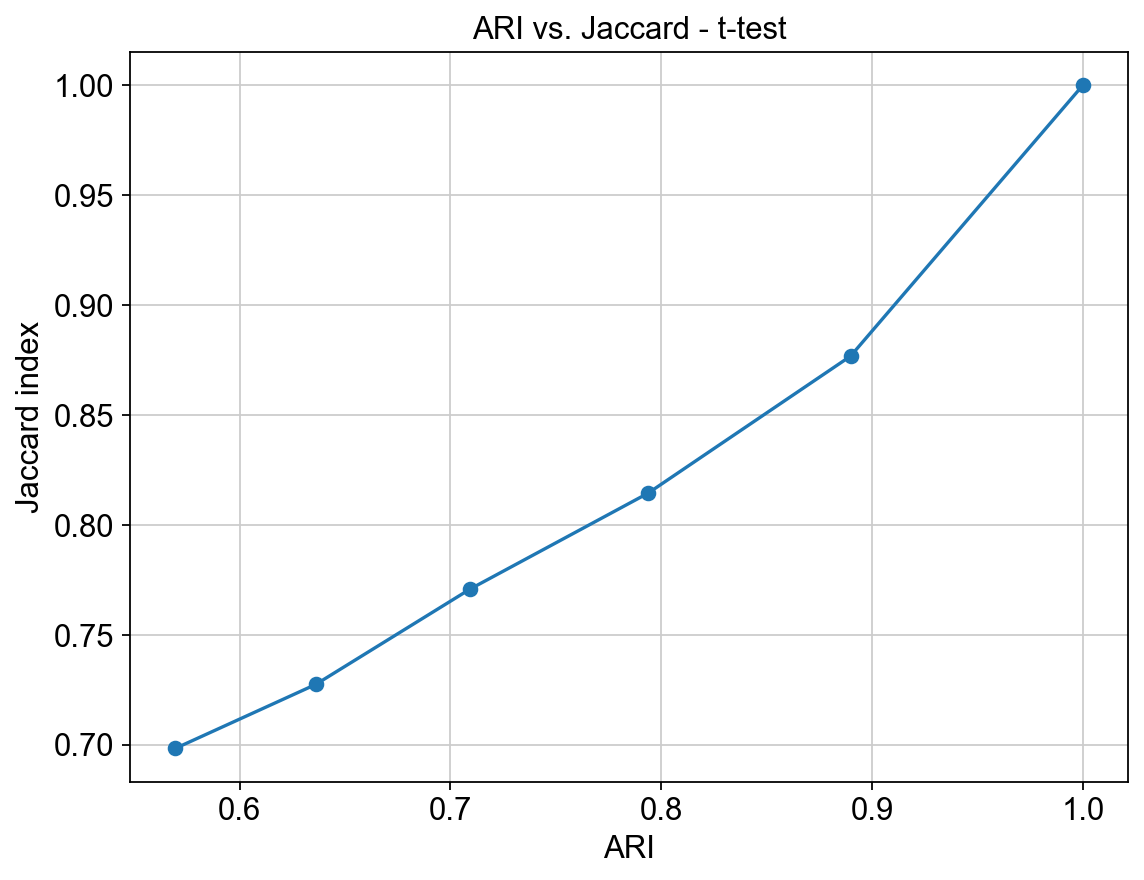

Running main_test_DE_method for method=t-test_overestim_var
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for CD4 T cells
Performing differential expression test for B cells
Performing differential expression test for CD14+ Monocytes
Performing differential expression test for NK cells
Performing differential expression test for CD8 T cells
Performing differential expression test for FCGR3A+ Monocytes
Performing differential expression test for Dendritic cells
Performing differential expression test for Megakaryocytes
Performing differential expression test for CD4 T cells
Performing differential expression test for B cells
Performing differential expression test for CD14+ Monocytes
Performing differential expression test for NK cells
Performing differential expre

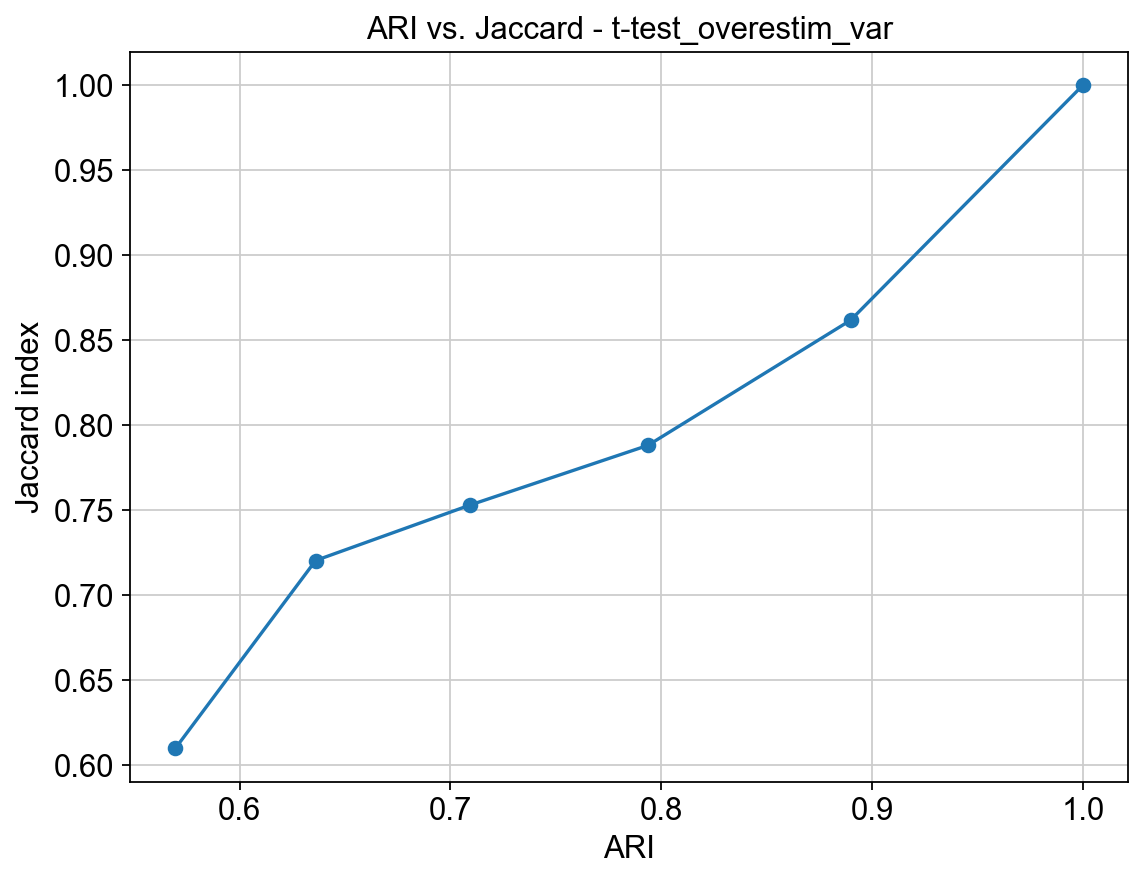

Running main_test_DE_method for method=wilcoxon
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for CD4 T cells
Performing differential expression test for B cells
Performing differential expression test for CD14+ Monocytes
Performing differential expression test for NK cells
Performing differential expression test for CD8 T cells
Performing differential expression test for FCGR3A+ Monocytes
Performing differential expression test for Dendritic cells
Performing differential expression test for Megakaryocytes
Performing differential expression test for CD4 T cells
Performing differential expression test for B cells
Performing differential expression test for CD14+ Monocytes
Performing differential expression test for NK cells
Performing differential expression test f

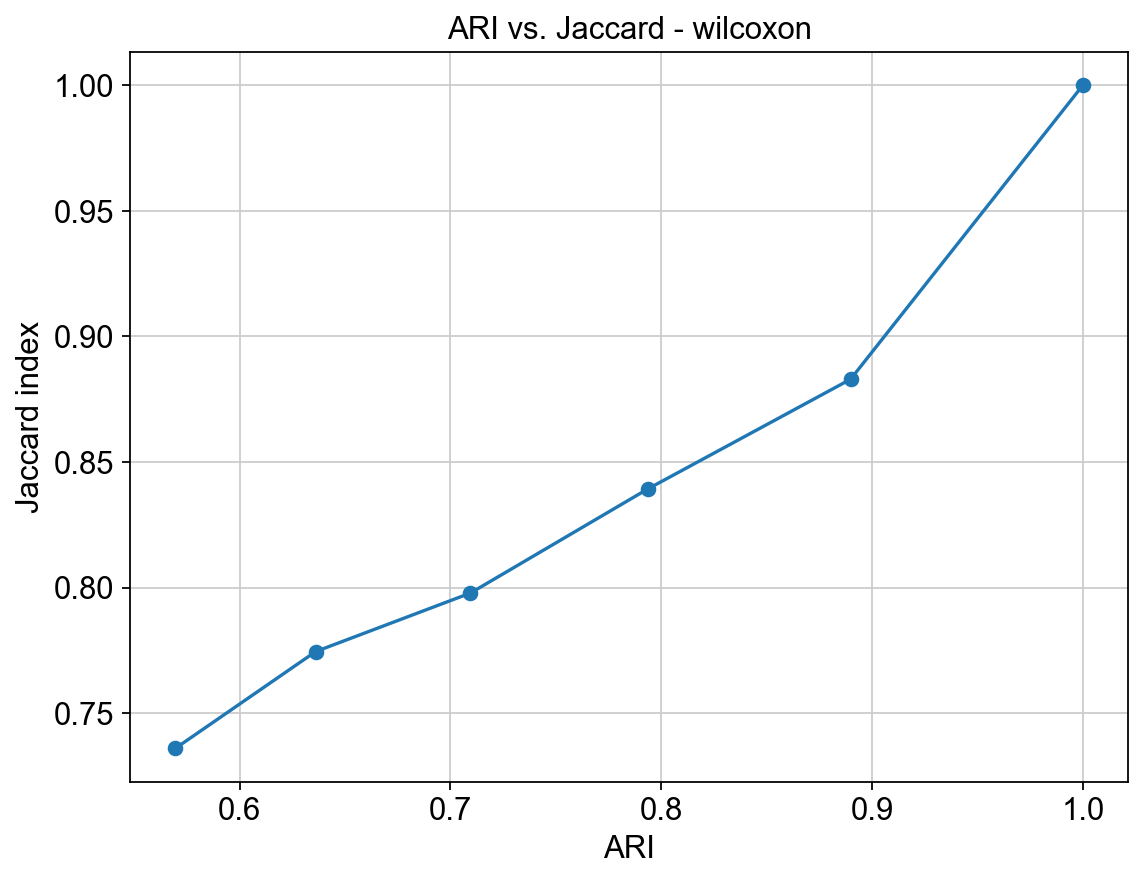

Running main_test_DE_method for method=diffxpy
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for CD4 T cells
Performing differential expression test for B cells
Performing differential expression test for CD14+ Monocytes
Performing differential expression test for NK cells
Performing differential expression test for CD8 T cells
Performing differential expression test for FCGR3A+ Monocytes
Performing differential expression test for Dendritic cells
Performing differential expression test for Megakaryocytes
Performing differential expression test for CD4 T cells
Performing differential expression test for B cells
Performing differential expression test for CD14+ Monocytes
Performing differential expression test for NK cells
Performing differential expression test fo

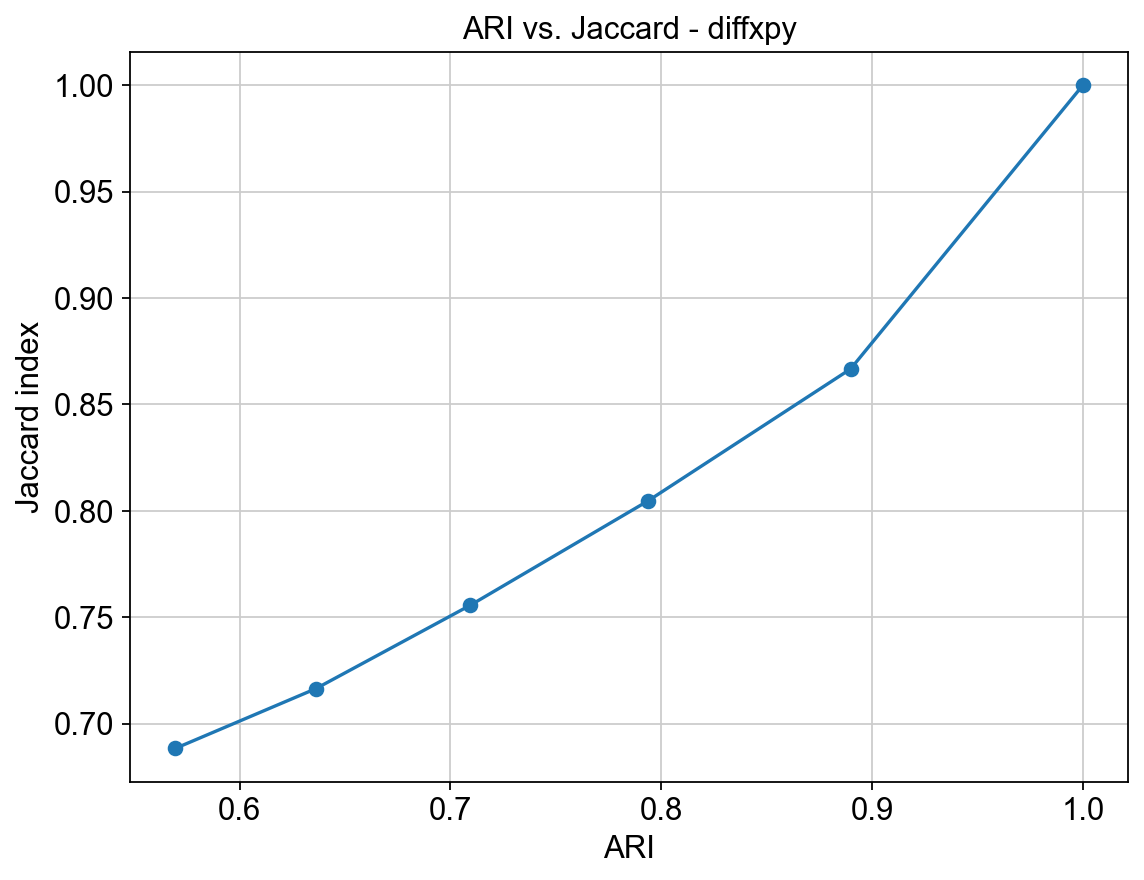

/var/folders/82/260g5q3n10v87g4dbrqkjf2r0000gn/T/ipykernel_4689/1485382365.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


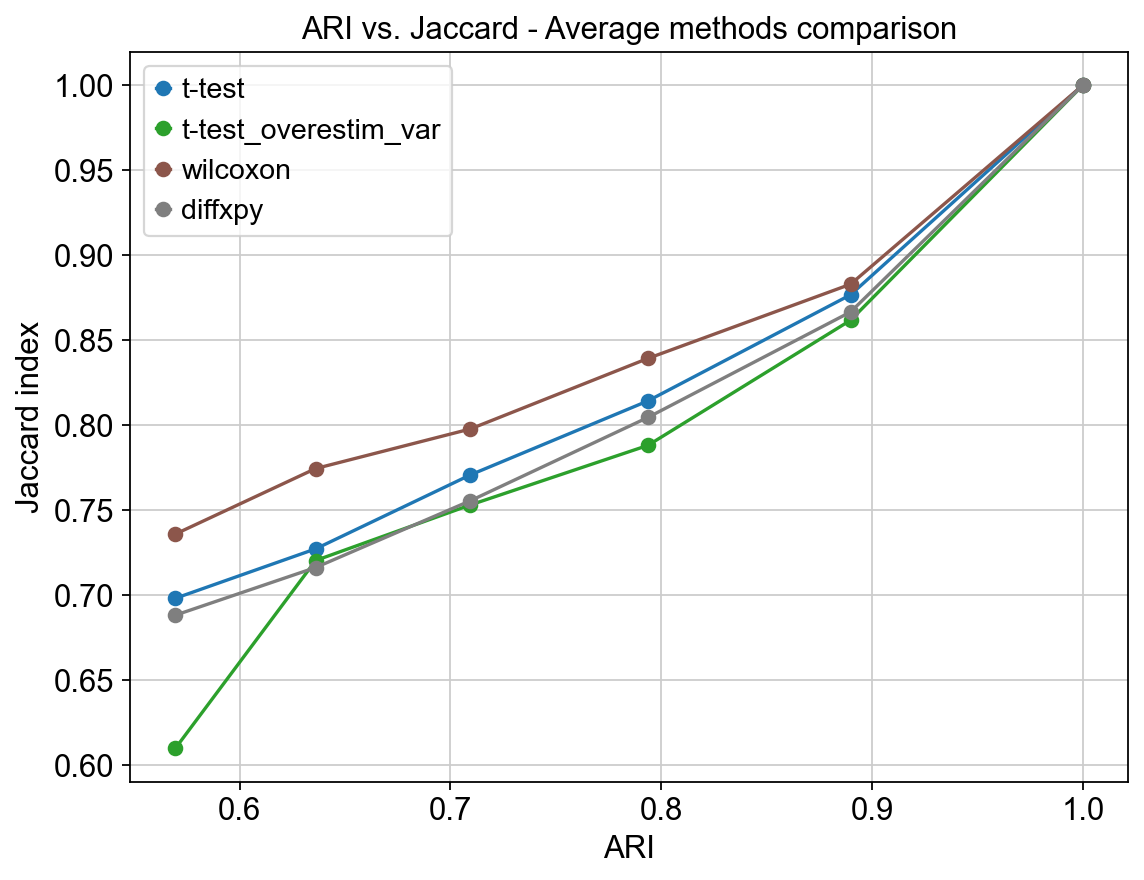

In [8]:
error_perc = [0, 5, 10, 15, 20, 25]
tests = ["t-test","t-test_overestim_var","wilcoxon","diffxpy"]

plot_ari_jaccard_methods_comparison_wrapper(adata_proc, error_perc,'louvain', tests, clust_label=None)

Running main_test_DE_method for clust_label=CD4 T cells
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for CD4 T cells
Performing differential expression test for CD4 T cells
Performing differential expression test for CD4 T cells
Performing differential expression test for CD4 T cells
Performing differential expression test for CD4 T cells
Performing differential expression test for CD4 T cells


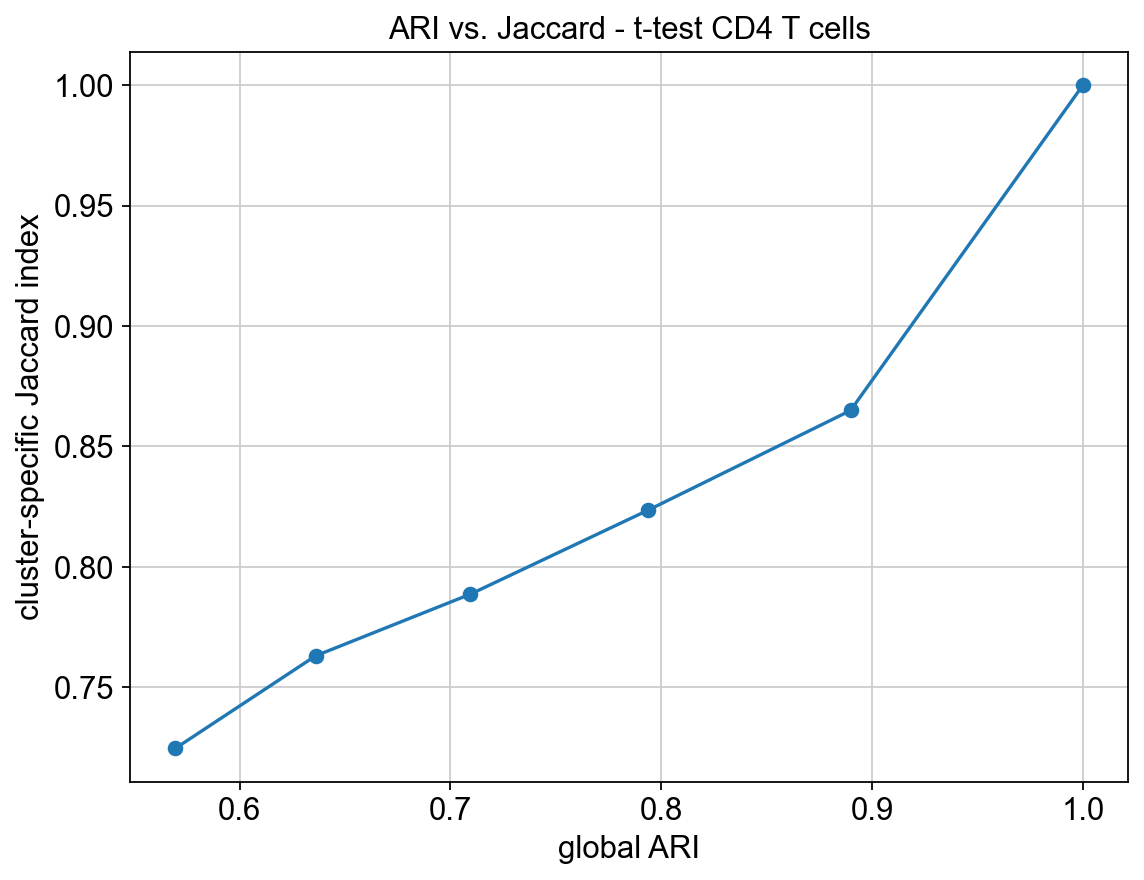

Running main_test_DE_method for clust_label=B cells
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for B cells
Performing differential expression test for B cells
Performing differential expression test for B cells
Performing differential expression test for B cells
Performing differential expression test for B cells
Performing differential expression test for B cells


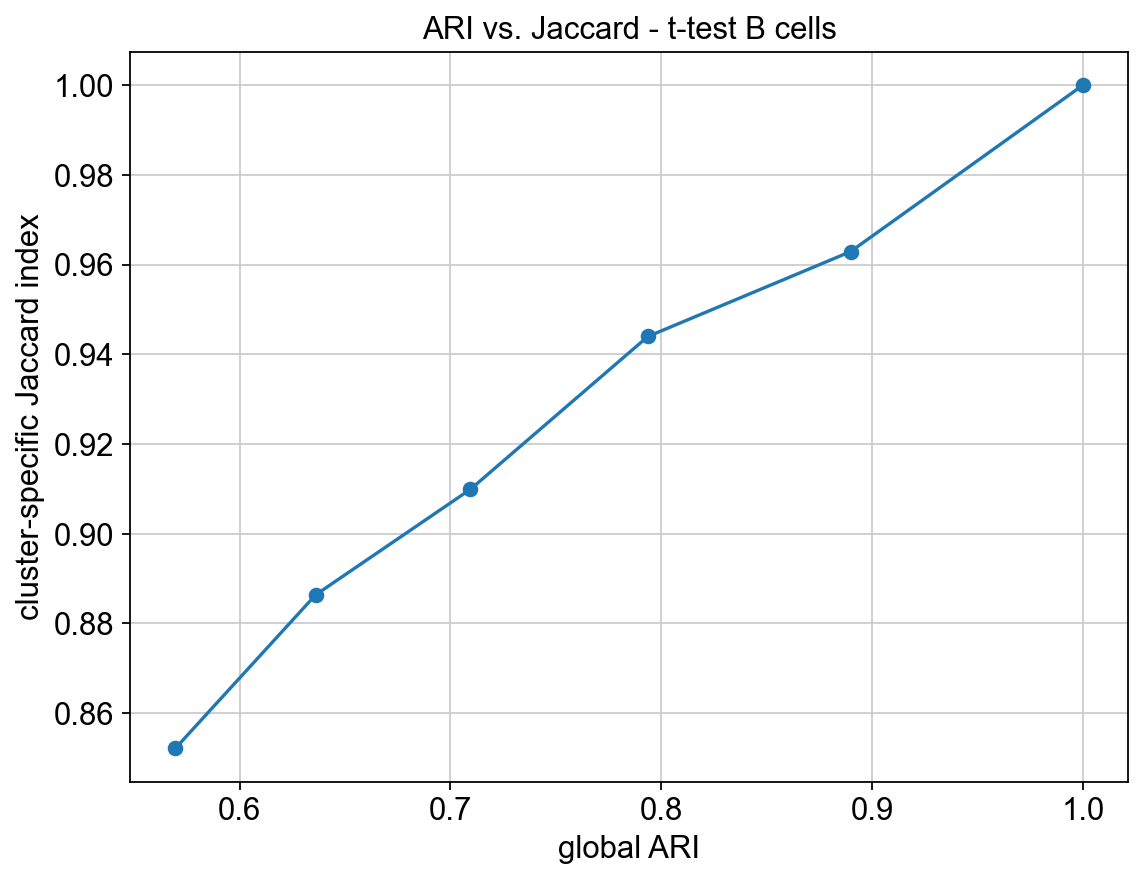

Running main_test_DE_method for clust_label=CD14+ Monocytes
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for CD14+ Monocytes
Performing differential expression test for CD14+ Monocytes
Performing differential expression test for CD14+ Monocytes
Performing differential expression test for CD14+ Monocytes
Performing differential expression test for CD14+ Monocytes
Performing differential expression test for CD14+ Monocytes


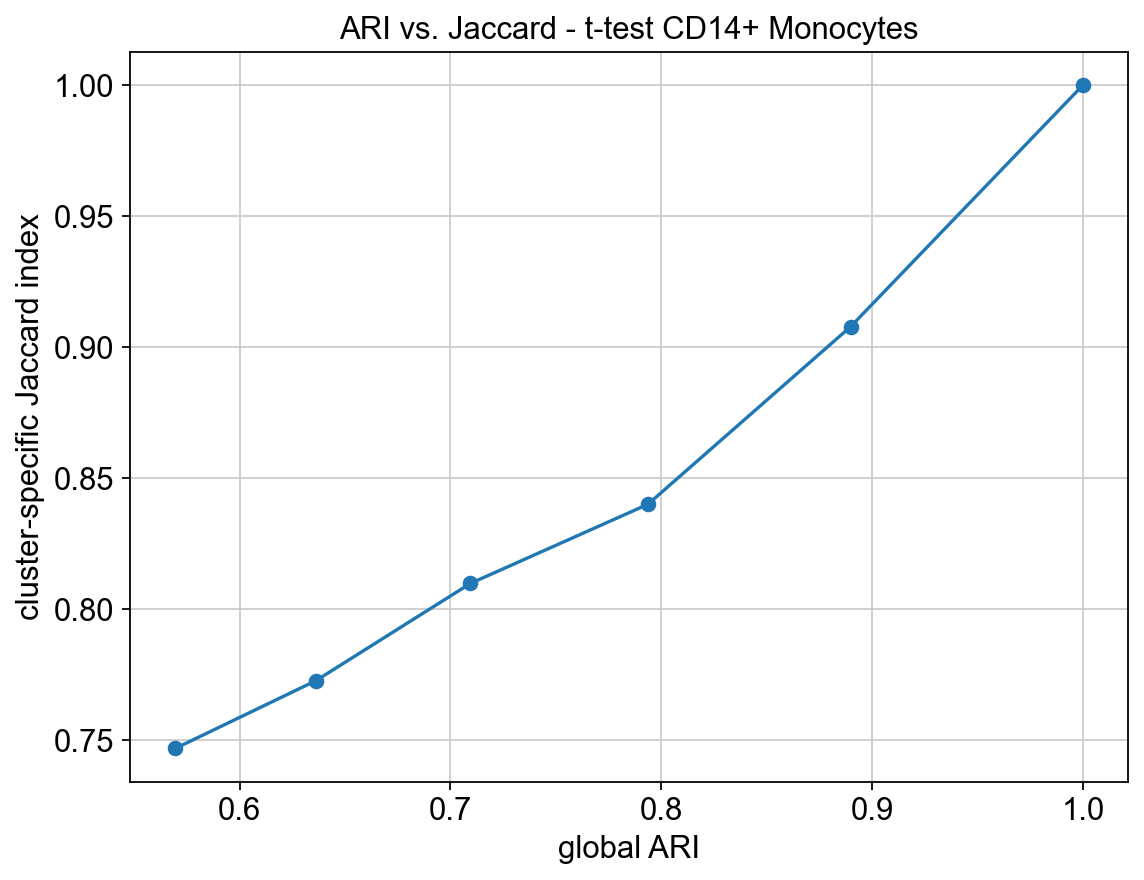

Running main_test_DE_method for clust_label=NK cells
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for NK cells
Performing differential expression test for NK cells
Performing differential expression test for NK cells
Performing differential expression test for NK cells
Performing differential expression test for NK cells
Performing differential expression test for NK cells


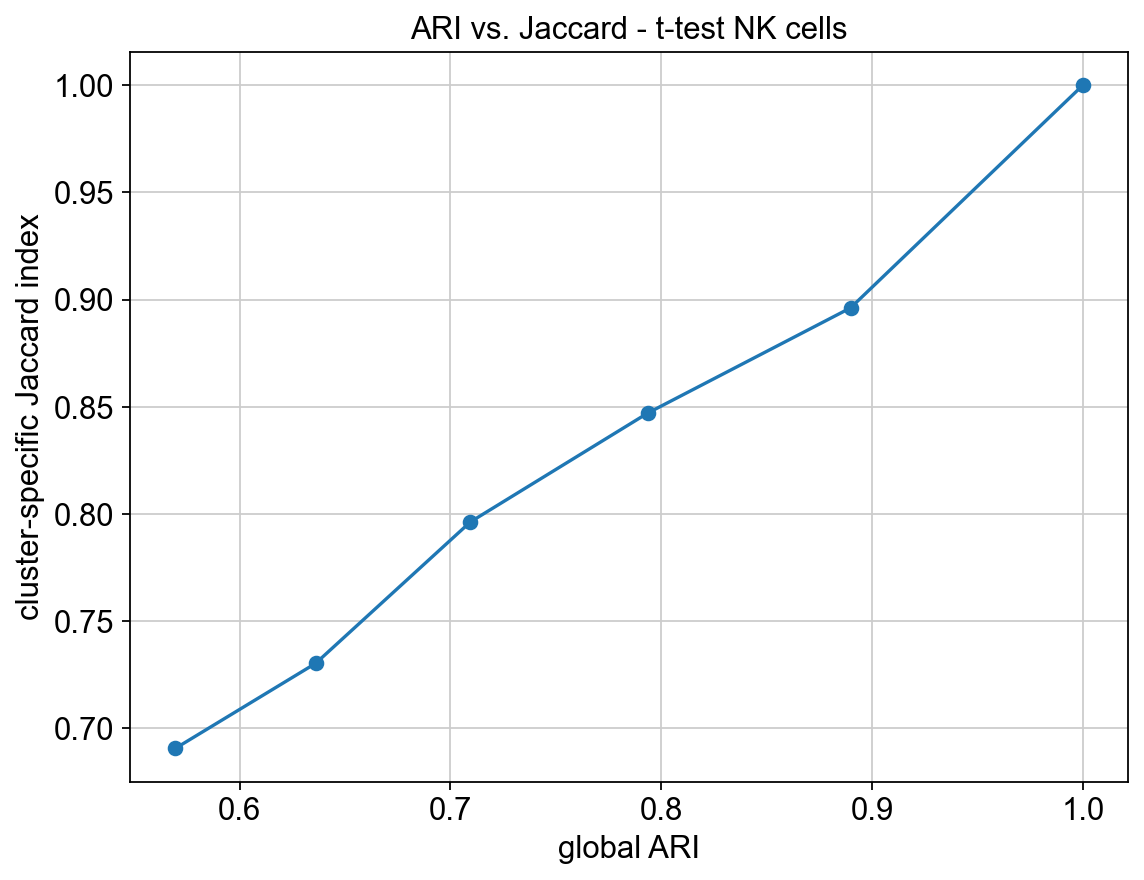

Running main_test_DE_method for clust_label=CD8 T cells
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for CD8 T cells
Performing differential expression test for CD8 T cells
Performing differential expression test for CD8 T cells
Performing differential expression test for CD8 T cells
Performing differential expression test for CD8 T cells
Performing differential expression test for CD8 T cells


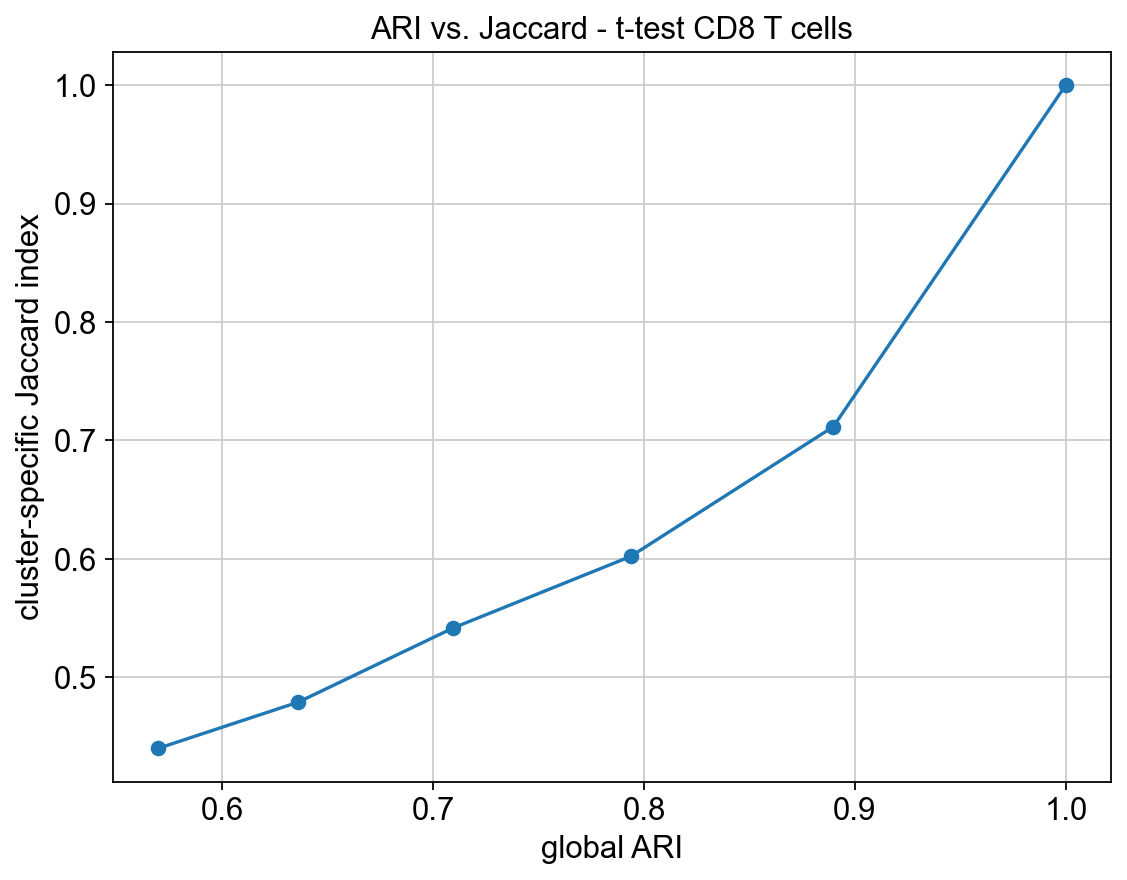

Running main_test_DE_method for clust_label=FCGR3A+ Monocytes
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for FCGR3A+ Monocytes
Performing differential expression test for FCGR3A+ Monocytes
Performing differential expression test for FCGR3A+ Monocytes
Performing differential expression test for FCGR3A+ Monocytes
Performing differential expression test for FCGR3A+ Monocytes
Performing differential expression test for FCGR3A+ Monocytes


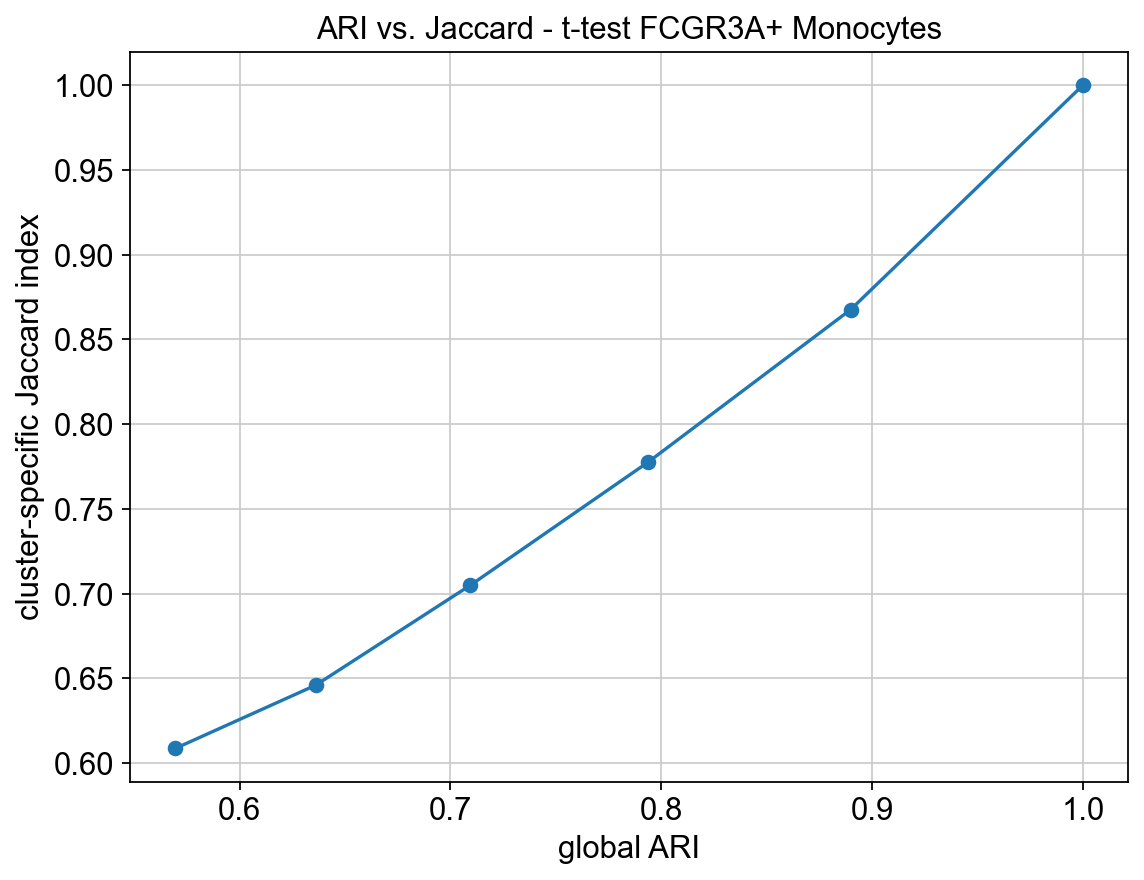

Running main_test_DE_method for clust_label=Dendritic cells
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for Dendritic cells
Performing differential expression test for Dendritic cells
Performing differential expression test for Dendritic cells
Performing differential expression test for Dendritic cells
Performing differential expression test for Dendritic cells
Performing differential expression test for Dendritic cells


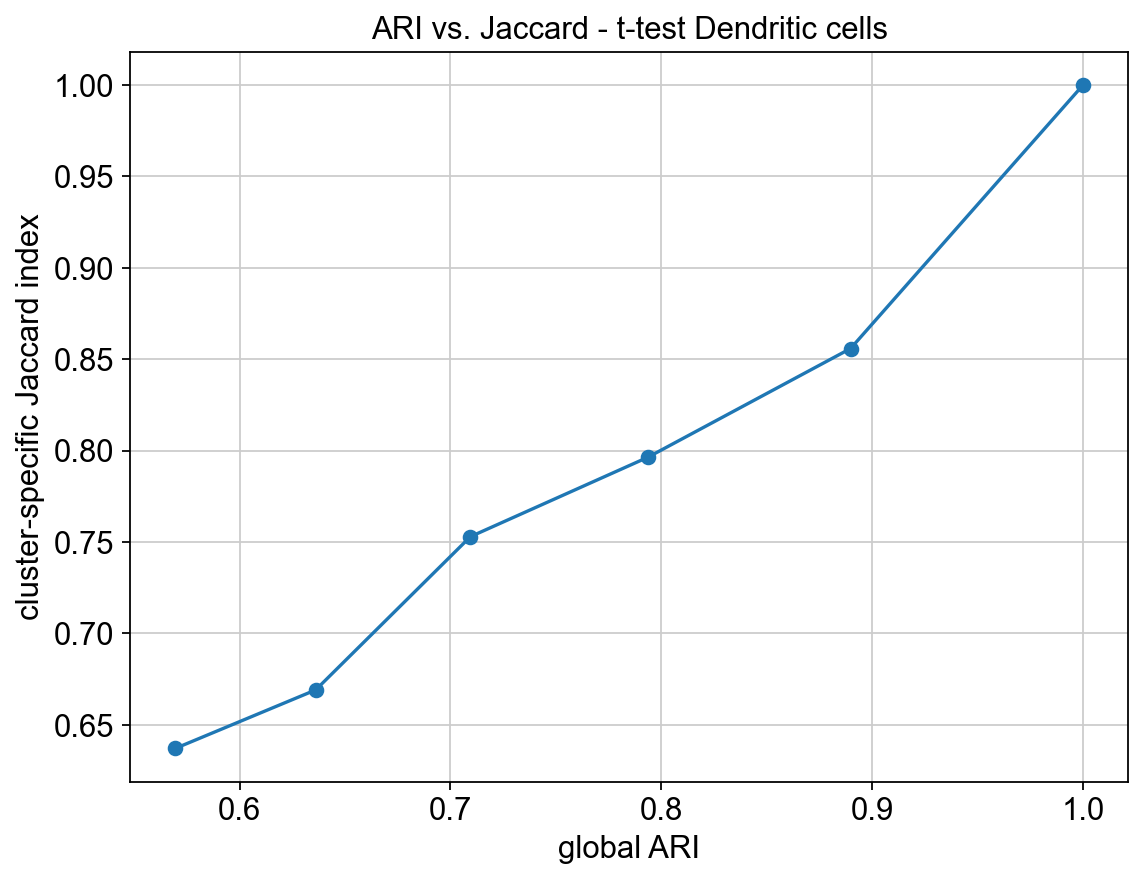

Running main_test_DE_method for clust_label=Megakaryocytes
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for Megakaryocytes
Performing differential expression test for Megakaryocytes
Performing differential expression test for Megakaryocytes
Performing differential expression test for Megakaryocytes
Performing differential expression test for Megakaryocytes
Performing differential expression test for Megakaryocytes


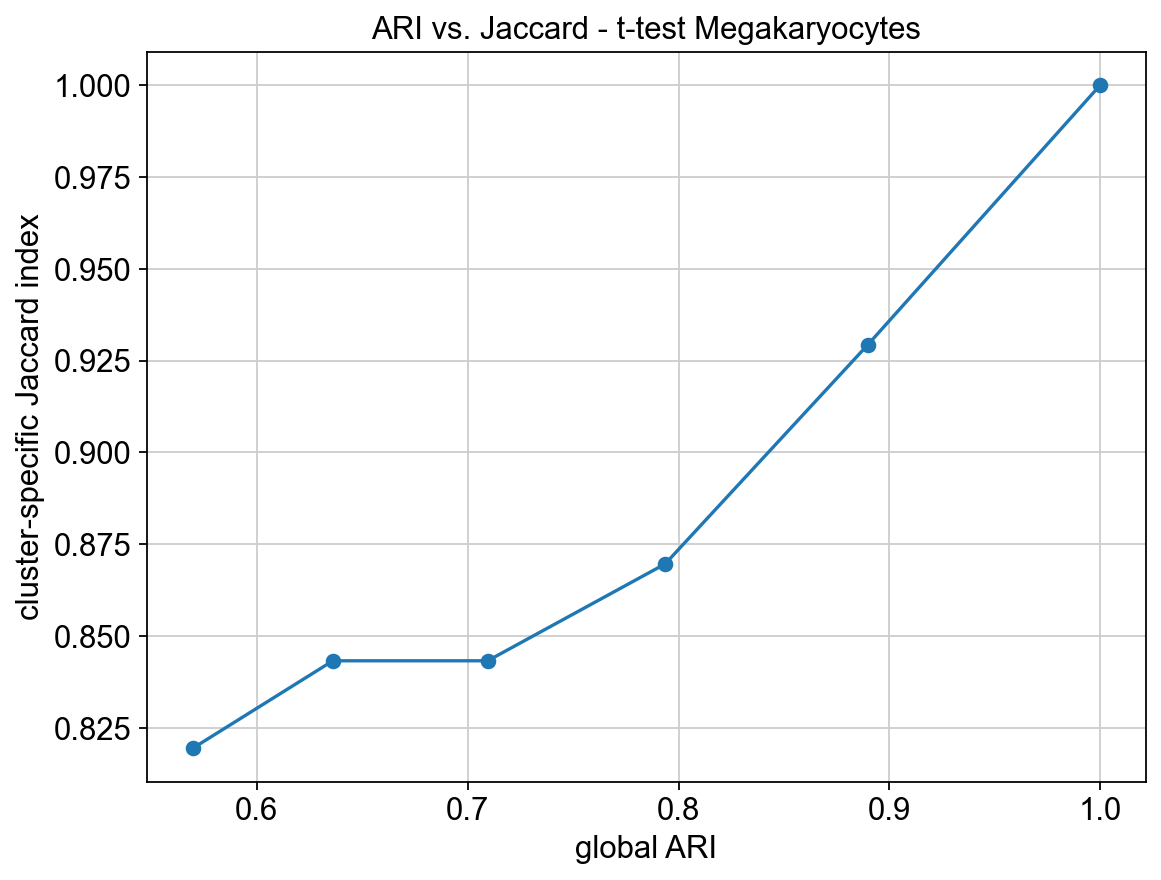

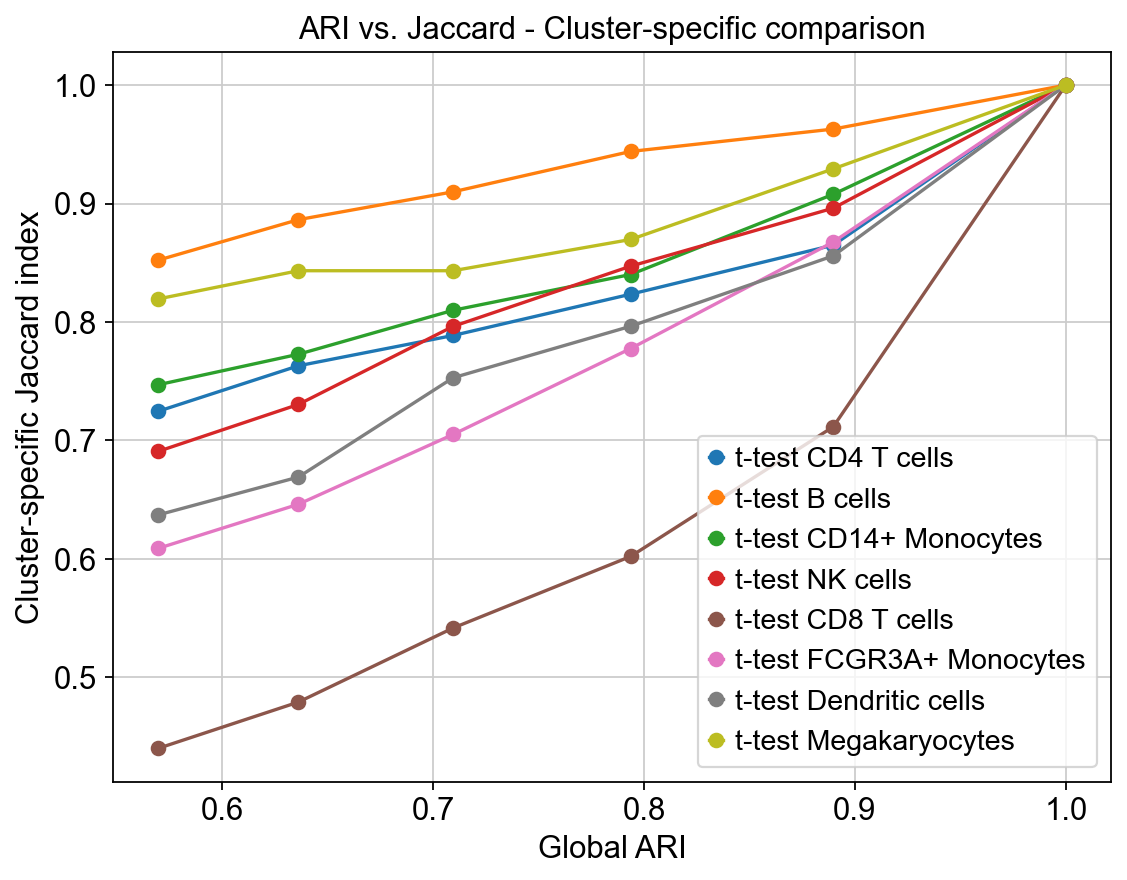

In [4]:
error_perc = [0, 5, 10, 15, 20, 25]
plot_ari_jaccard_auto_clust_labels_comparison_wrapper(adata_proc, error_perc, 'louvain', 't-test')

##### Pbmcs68k reduced

In [23]:
adata_proc_68.obs['bulk_labels']

index
AAAGCCTGGCTAAC-1     CD14+ Monocyte
AAATTCGATGCACA-1          Dendritic
AACACGTGGTCTTT-1           CD56+ NK
AAGTGCACGTGCTA-1    CD4+/CD25 T Reg
ACACGAACGGAGTG-1          Dendritic
                         ...       
TGGCACCTCCAACA-8          Dendritic
TGTGAGTGCTTTAC-8          Dendritic
TGTTACTGGCGATT-8    CD4+/CD25 T Reg
TTCAGTACCGGGAA-8            CD19+ B
TTGAGGTGGAGAGC-8          Dendritic
Name: bulk_labels, Length: 700, dtype: category
Categories (10, object): ['CD4+/CD25 T Reg', 'CD4+/CD45RA+/CD25- Naive T', 'CD4+/CD45RO+ Memory', 'CD8+ Cytotoxic T', ..., 'CD19+ B', 'CD34+', 'CD56+ NK', 'Dendritic']

### CITE-Seq dataset

In [6]:
adata_multi

AnnData object with n_obs × n_vars = 161764 × 20729
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'nCount_SCT', 'nFeature_SCT'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_apca', 'X_aumap', 'X_pca', 'X_spca', 'X_umap', 'X_wnn.umap'
    varm: 'PCs', 'SPCA'
    obsp: 'distances'

/Users/greta_bordin/opt/anaconda3/envs/lab/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


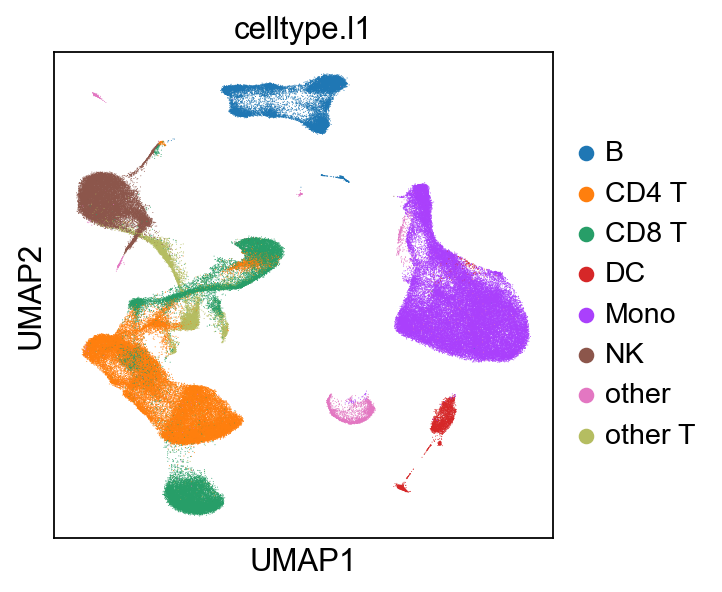

In [10]:
sc.pl.umap(adata_multi, color = 'celltype.l1')

Running clust_error with percentage=0
Running clust_error with percentage=5
Performing differential expression test for Mono
Performing differential expression test for CD4 T
Performing differential expression test for CD8 T
Performing differential expression test for NK
Performing differential expression test for B
Performing differential expression test for other T
Performing differential expression test for other
Performing differential expression test for DC
Performing differential expression test for Mono
Performing differential expression test for CD4 T
Performing differential expression test for CD8 T
Performing differential expression test for NK
Performing differential expression test for B
Performing differential expression test for other T
Performing differential expression test for DC
Performing differential expression test for other


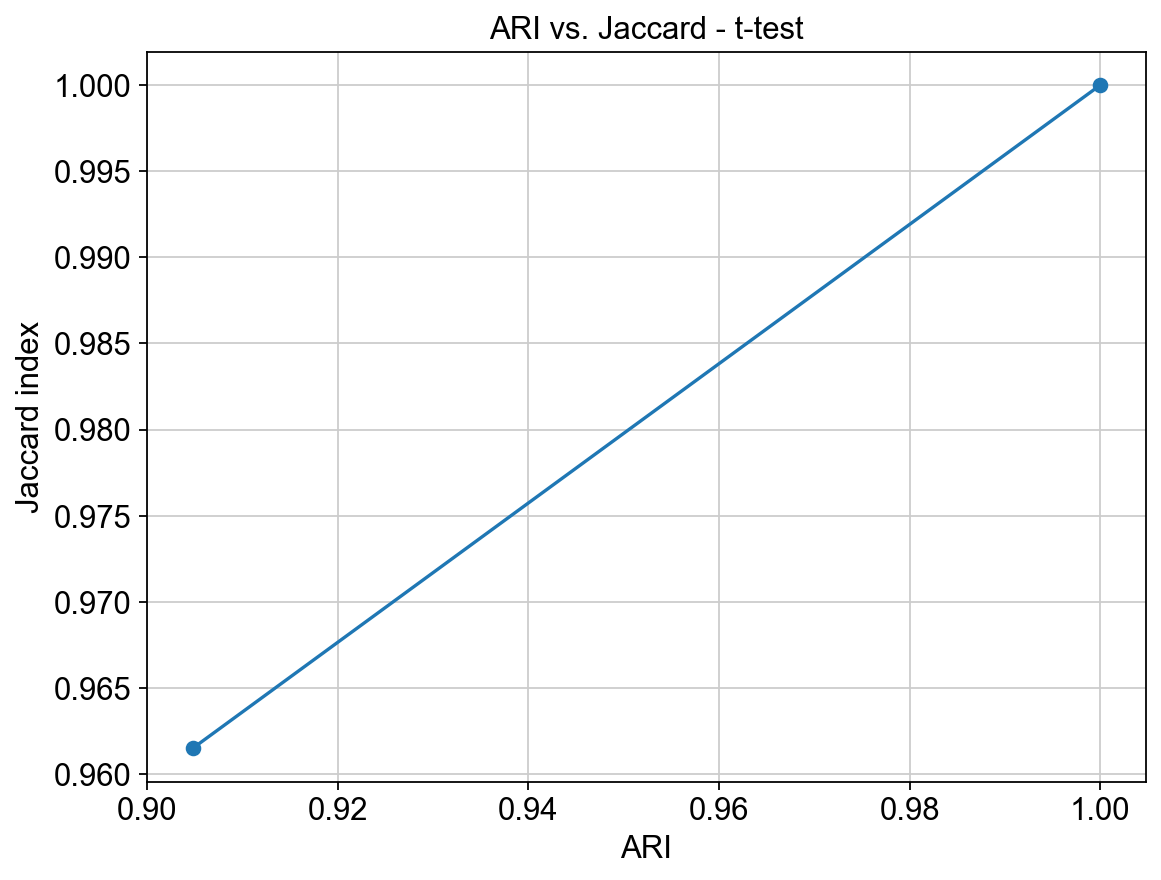

In [12]:
error_perc = [0, 5]#, 10, 15, 20, 25]

# available DE tests: 't-test','t-test_overestim_var','wilcoxon'or 'diffxpy'(Wald test)
results_multi = main_test_DE_method(adata_multi, error_perc, 'celltype.l1', 't-test')